**SALARY ANALYSIS**

Importing Libraries and Loading Dataset

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

**Salary distribution among differnet Job Roles**

In [ ]:
# filter for the job titles and country
df_India = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

#finding out the top 6 Job titles on the basis of average salary

job_titles = df_India['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_India_top6 = df_India[df_India['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_India_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

Firstly we have taken out the average salary of all the job titles, then found out the top 6 Job titles with highest average yearly salary.

**BOX PLOT OF TOP 6 JOB ROLES IN DATA ANALYTICS**

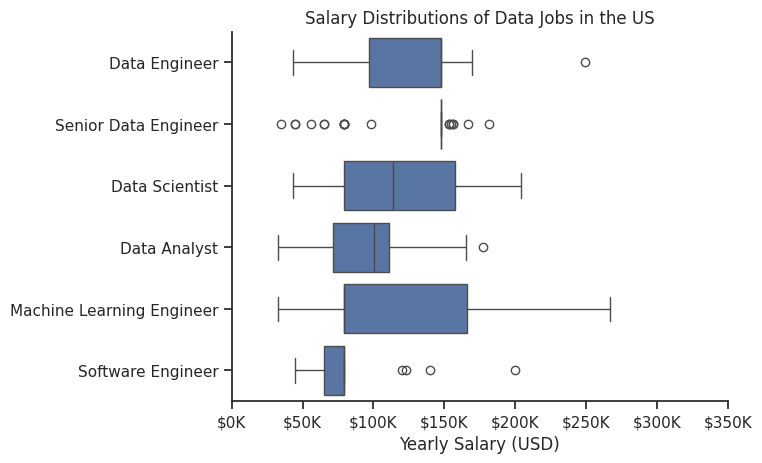

In [ ]:
sns.boxplot(data=df_India_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 350000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

**Highest Earning Potential:** Machine Learning Engineers have the widest "box" and whiskers, stretching toward the $250K+ mark. This indicates a very high ceiling for salary, though also a wide variety in pay.

**Most Consistent Pay:** Software Engineers (in this specific dataset) show a very narrow box concentrated around $75K. This group has a standardized pay.

**Seniority vs. Standard Roles:** Interestingly, the Senior Data Engineer median is quite high (around $150K), but it has a massive amount of "low-end" outliers. This could suggest that some roles labeled "Senior" in certain companies or regions actually pay much less than the national industry standard.

**Data Scientist vs. Data Analyst:** As expected, Data Scientists generally earn more than Data Analysts. Both the median and the entire middle-50% box for Data Scientists are shifted further to the right (higher salary) than those for Analysts.

**DETERMINING THE HIGHEST PAYING SKILLS IN INDIA**

In [ ]:
# Only get data analyst jobs in the US
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

df_DA_India = df_DA_India.explode('job_skills')

df_DA_India[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [ ]:
df_DA_top_pay = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [ ]:
df_DA_skills = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


**DATA VISUALISATION**

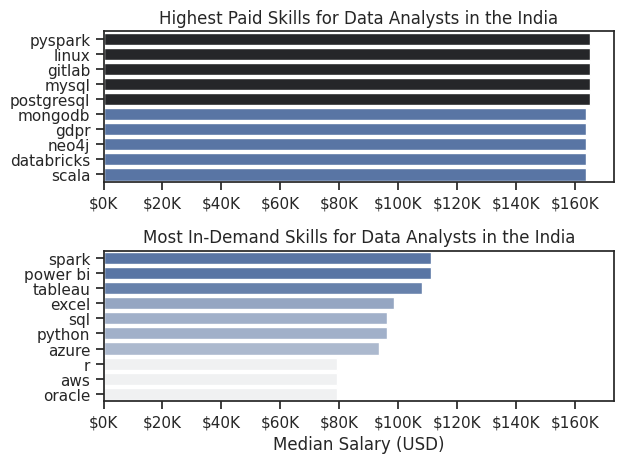

In [ ]:
fig, ax = plt.subplots(2, 1)

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()



# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()

# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()

There is a significant gap between the "In-Demand" skills (like Excel and SQL) and the "Highest Paid" skills (like PySpark and Neo4j). This suggests that while you need the in-demand skills to get your foot in the door, learning the "Highest Paid" technical infrastructure skills is the key to significantly increasing your earning potential.